In [24]:
import  pandas as pd
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv('Live.csv')
data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [26]:
data = data.drop(['Column1','Column2','Column3','Column4','status_id','status_published'],axis=1)

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['status_type'] = le.fit_transform(data['status_type'])


data['status_type'].unique()

array([3, 1, 0, 2])

In [28]:
from sklearn.preprocessing import StandardScaler 

ss = StandardScaler()
x = ss.fit_transform(data)

x

array([[ 1.37428794,  0.64610394,  0.32335035, ...,  0.07671305,
         0.47357035, -0.15574803],
       [-0.74810636, -0.17319166, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 1.37428794, -0.00673846,  0.01308938, ...,  0.07671305,
        -0.152587  , -0.15574803],
       ...,
       [-0.74810636, -0.49312768, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.74810636,  0.26131603, -0.23871662, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.74810636, -0.46070173, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803]])

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(data.columns))
x = pca.fit_transform(x)
pca.explained_variance_


array([3.61421304e+00, 1.76780096e+00, 9.71184224e-01, 9.52776801e-01,
       8.20101041e-01, 7.05942108e-01, 6.52623111e-01, 3.68136678e-01,
       1.48640665e-01, 1.64809304e-08])

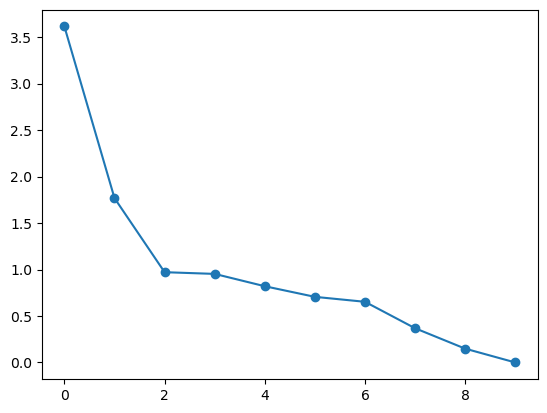

In [35]:
##scree tree

plt.plot(pca.explained_variance_,'-o')

In [36]:
pca = PCA(n_components=2)
x = pca.fit_transform(x)
pca.explained_variance_

array([3.61421304, 1.76780096])

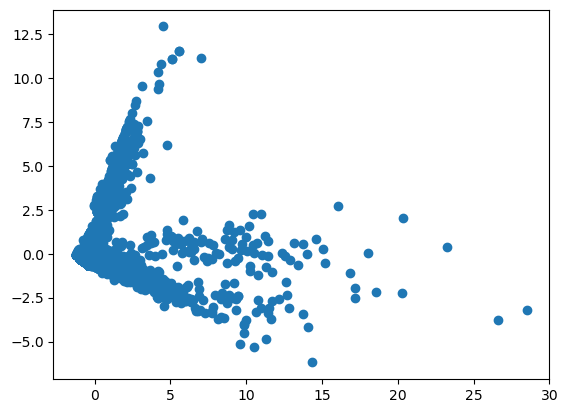

In [37]:
plt.scatter(x[:,0],x[:,1],)

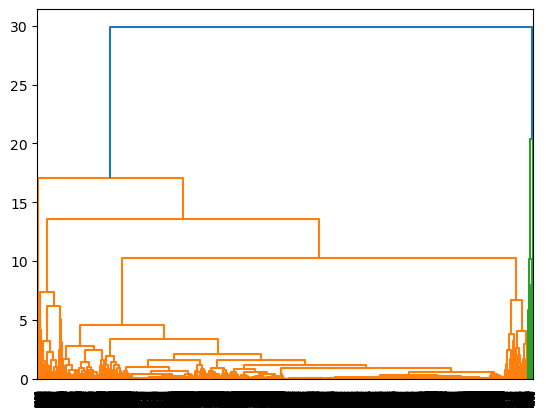

In [38]:
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(x,method='complete'))


In [39]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering()
cluster = ac.fit_predict(x)
cluster

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

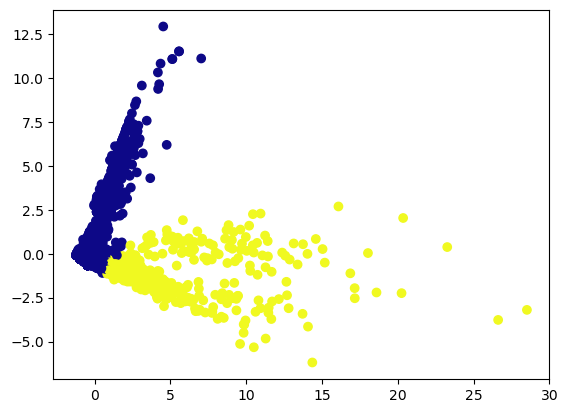

In [43]:
plt.scatter(x[:,0],x[:,1],c=cluster,cmap="plasma")

In [42]:
from sklearn.metrics import silhouette_score as ss

ss(x,cluster)

0.6828366212104323